<a href="https://colab.research.google.com/github/MrNytro/Neuron-labs-Internship/blob/main/Week%203(Customer%20Segmentation)/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [10]:
data = pd.read_csv('onlineretail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [11]:
data.shape
data.describe()

,Quantity,UnitPrice,CustomerID
count,1000.000000,1000.000000,999.000000
mean,12.785000,3.037110,16023.130130
std,38.423706,5.896942,1865.129933
min,-24.000000,0.000000,12431.000000
25%,2.000000,1.250000,14688.000000
50%,4.000000,2.100000,16210.000000
75%,12.000000,3.750000,17908.000000
max,600.000000,165.000000,18085.000000


In [12]:
data.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [13]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        0
dtype: int64

In [14]:
plt.style.use('fivethirtyeight')

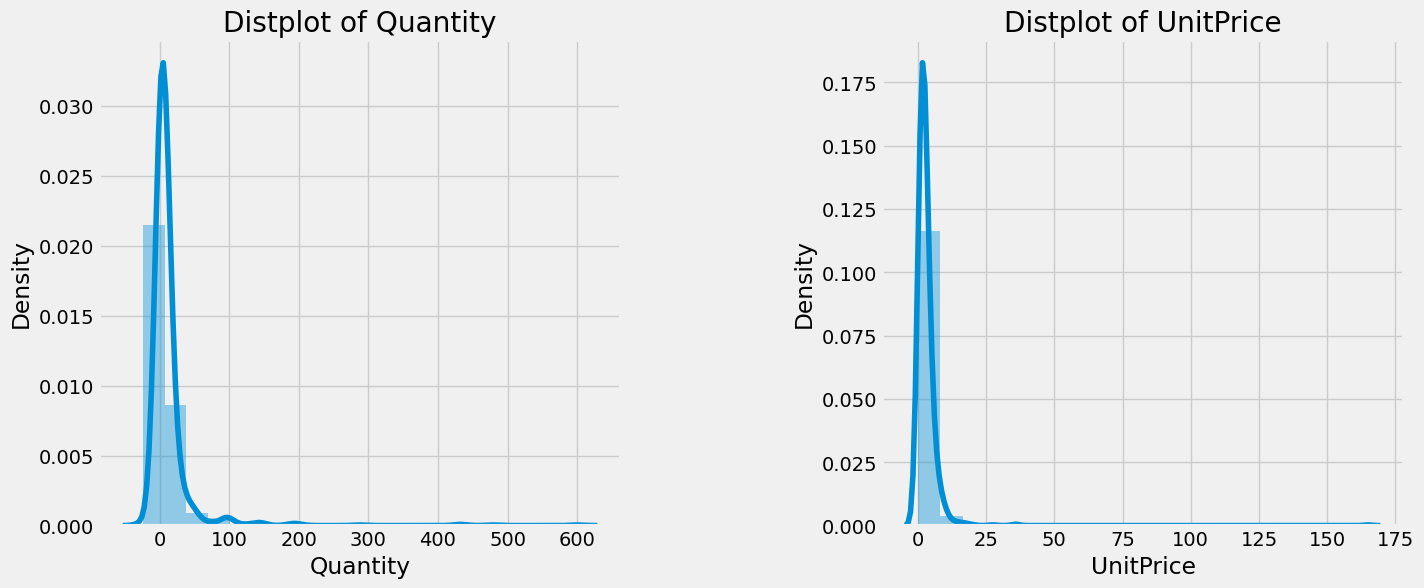

In [15]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Quantity', 'UnitPrice']:
    n += 1
    plt.subplot(1, 2, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [16]:
X = data[['Quantity', 'UnitPrice']].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                       tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

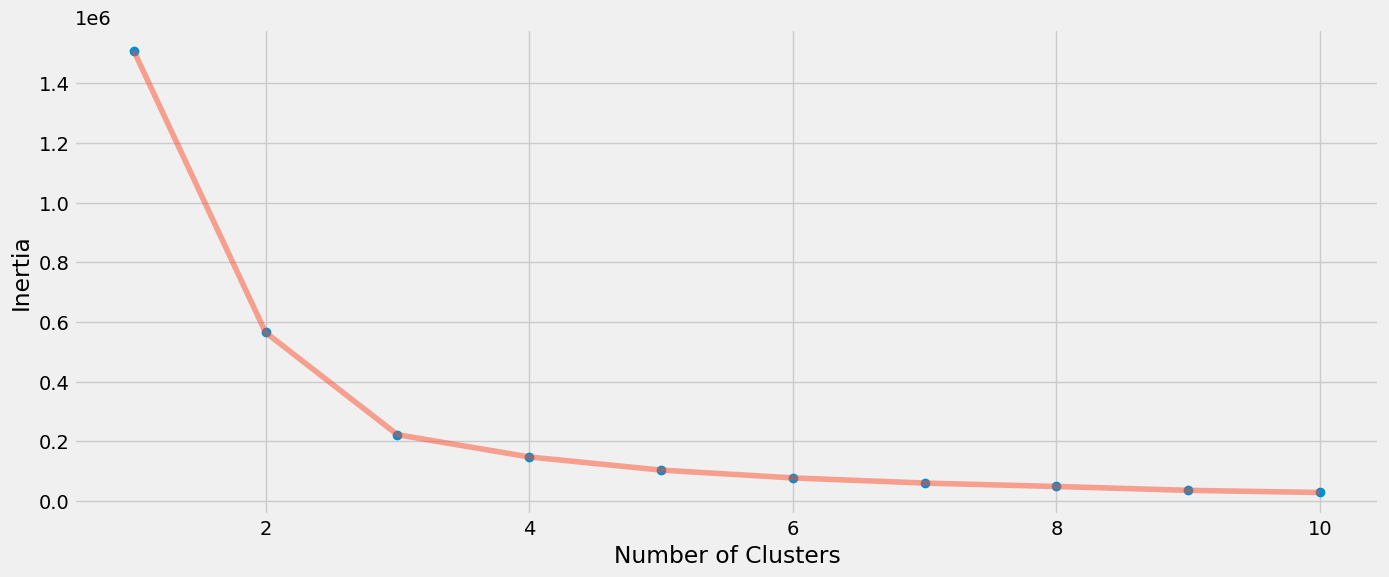

In [17]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [18]:
algorithm = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_


In [19]:
h = 5
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


In [20]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

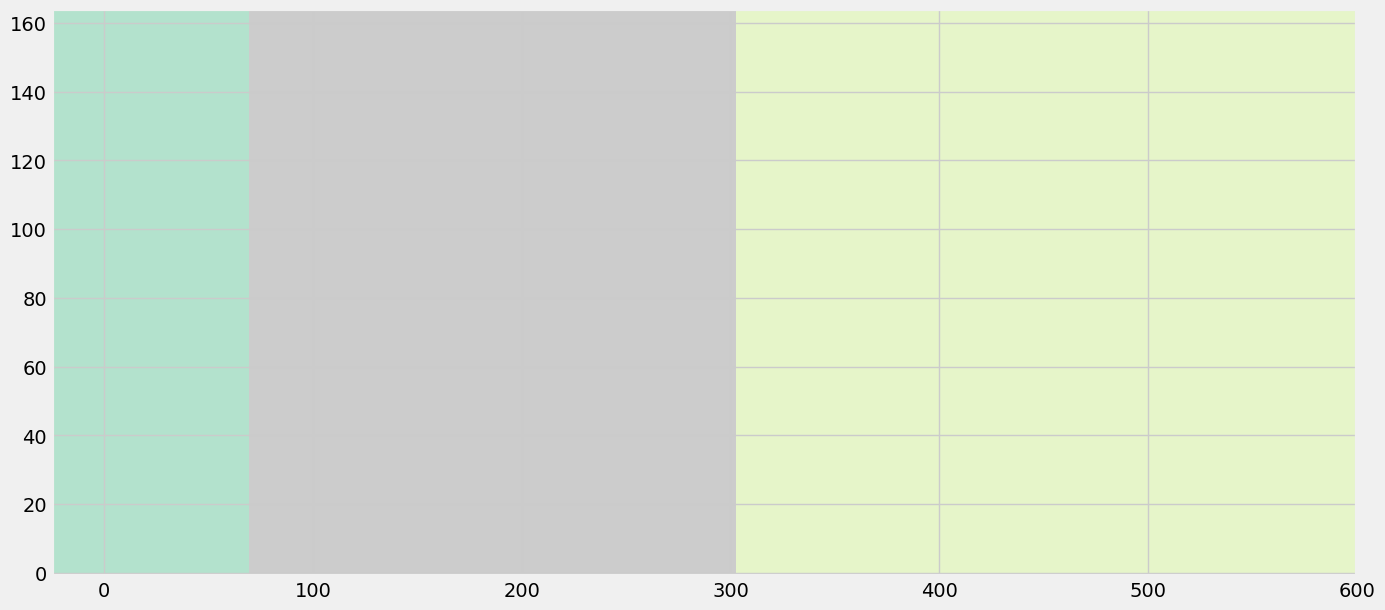

In [21]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

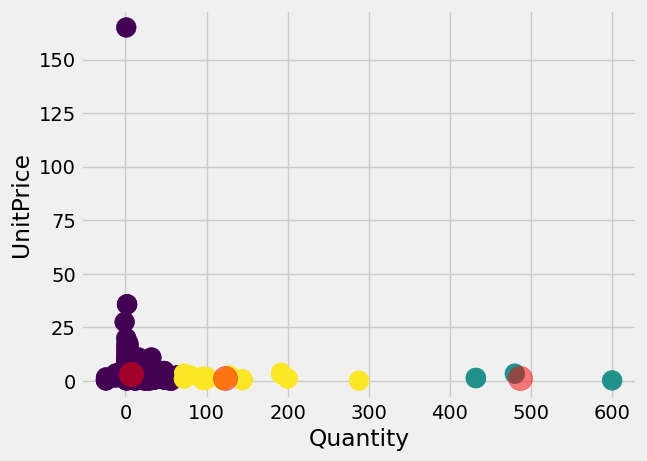

In [22]:
plt.scatter(x='Quantity', y='UnitPrice', data=data, c=labels, s=200)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('UnitPrice'), plt.xlabel('Quantity')
plt.show()